# Log-normal Distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

### Introduction

The log-normal distribution is a distribution with a slightly fat tail and skewness.

Some examples of a log-normal distribution could be:

* Labor income
* Stock returns

### Details

A random variable, $X$, is log-normal if the random variable given by $\log(X)$ is normal. The reverse statement of this would be if $Y$ were a normal random variable then $X \equiv \exp(Y)$ is a log-normal random variable.

The log-normal distribution can be characterized by two parameters, $\mu$ and $\sigma$. These parameters match up to the mean and standard deviation of $\log(X)$, i.e., $\log(X) \sim N(\mu, \sigma)$.

Since $X \equiv \exp(Y)$ where $Y$ is a normal random variable then the possible values for the log-normal random variable are all positive real values.

The probability density function is given by

\begin{align*}
  f(x; \mu,\sigma) \equiv  \frac{1}{x}\frac{1}{\sigma\sqrt[]{2\pi } }e^{\frac{(\ln x-\mu)^2 }{-2\sigma^2}}
\end{align*}

The cumulative density function is given by

\begin{align*}
  F(x; \mu,\sigma) \equiv  \Phi(\frac{\ln x-\mu}{\sigma})
\end{align*}<br>
  where $\Phi$ is the PDF of standard normal distribution


* **Mean**: $e^{\mu+\frac{1}{2}\sigma^2}$
* **Variance**: $e^{2\mu+\sigma^2}(e^{\sigma^2}-1)$

In [2]:
def lognorm_plot_pdf_cdf(mu, sigma):
    lnrv = st.lognorm(s=sigma, loc=0, scale=math.exp(mu))
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))
    
    xvals = np.linspace(0, 25, 10000)
    ax[0].plot(xvals, lnrv.pdf(xvals))
    ax[0].set_title("Probability Density Function")
    
    ax[1].plot(xvals, lnrv.cdf(xvals))
    ax[1].set_title("Cumulative Distribution Function")
    
    return None

In [3]:
fs1 = FloatSlider(
    value=0, min=-3, max=3,
    step=0.25, description="mu",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [4]:
fs2 = FloatSlider(
    value=1, min=0.1, max=2.0,
    step=0.1, description="sigma",
    style={"description_width": "50%"},
    layout={"width": "40%"}
)

In [5]:
output = interact(lognorm_plot_pdf_cdf, mu=fs1, sigma=fs2)

interactive(children=(FloatSlider(value=0.0, description='mu', layout=Layout(width='40%'), max=3.0, min=-3.0, …

### Example
Suppose $S_t$ is the stock price at $t$ and that

$$\frac{S_t}{S_{t-1}}\sim \text{log normal}((\mu-\frac{1}{2}\sigma^2),  \sigma^2)$$

Note that if we set

$$\text{mu} = (\mu-\frac{1}{2}\sigma^2)$$

and

$$\text{sigma} = \sigma^2$$

then $\log \left( \frac{S_t}{S_{t-1}} \right) \sim \text{normal}(\text{mu}, \text{sigma}^2)$

In [6]:
mu = 0.005
sigma = 0.10

lrv = st.lognorm(scale=np.exp(mu), s=sigma)  # Note the non-standard parameterization

In [16]:
lrv.rvs()

1.0656384935643233

What's the distribution of $\log \left( \frac{S_{t}}{S_{0}} \right)$?

Well, we can "multiply by one" in a creative way to get:
    
\begin{align*}
  \log \left( \frac{S_t}{S_0} \right) &= \log \left( \frac{S_t}{S_{t-1}} \frac{S_{t-1}}{S_0} \right) \\
    &\dots \\
    &= \log \left( \frac{S_t}{S_{t-1}} \frac{S_{t-1}}{S_{t-2}} \dots \frac{S_1}{S_0} \right) \\
    &= \log \left( \frac{S_t}{S_{t-1}} \right) + \dots + \log \left( \frac{S_{1}}{S_0} \right)
\end{align*}

Since each of these is a normal random variable and the sum of normal random variables is a normal random variable, then $\log \left( \frac{S_t}{S_0} \right)$ is also a normal random variable! It has a mean parameter of $t \mu$ and a standard deviation parameter of $\sigma t$.

In [19]:
nT = 20
nS = 5_000
samples = np.zeros((nS, nT))
means = np.zeros(nT)
stds = np.zeros(nT)

for t in range(1, nT+1):
    _lrv = st.lognorm(scale=np.exp(mu*t), s=sigma*t)
    samples[:, t-1] = _lrv.rvs(nS)
    means[t-1] = _lrv.mean()
    stds[t-1] = _lrv.std()

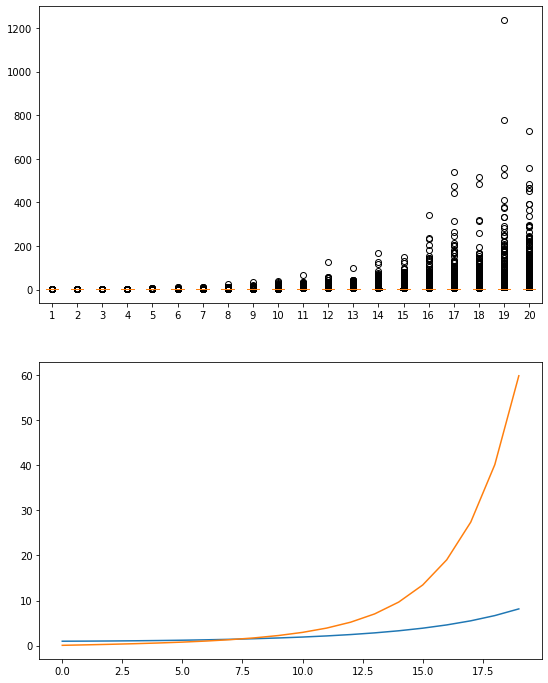

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

ax[0].boxplot(samples);

ax[1].plot(means)
ax[1].plot(stds)